In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1, "../")
from lmtanalysis.FileUtil import getFilesToProcess
import sqlite3
from lmtanalysis.Animal import *
import matplotlib.pyplot as plt
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
from lmtanalysis import BuildEventTrain3, BuildEventTrain4, BuildEventTrain2, BuildEventFollowZone, BuildEventRear5, BuildEventFloorSniffing,\
    BuildEventSocialApproach, BuildEventSocialEscape, BuildEventApproachContact,BuildEventOralOralContact,\
    BuildEventApproachRear, BuildEventGroup2, BuildEventGroup3, BuildEventGroup4, BuildEventOralGenitalContact, \
    BuildEventStop, BuildEventWaterPoint, \
    BuildEventMove, BuildEventGroup3MakeBreak, BuildEventGroup4MakeBreak,\
    BuildEventSideBySide, BuildEventSideBySideOpposite, BuildEventDetection,\
    BuildDataBaseIndex, BuildEventWallJump, BuildEventSAP,\
    BuildEventOralSideSequence, CheckWrongAnimal,\
    CorrectDetectionIntegrity, BuildEventNest4, BuildEventNest3, BuildEventGetAway    
from psutil import virtual_memory
from tkinter.filedialog import askopenfilename
from lmtanalysis.TaskLogger import TaskLogger
import traceback
from lmtanalysis.EventTimeLineCache import flushEventTimeLineCache,\
    disableEventTimeLineCache
from lmtanalysis.EventTimeLineCache import EventTimeLineCached
import pandas as pd
import time
from datetime import *
import colorsys
from collections import Counter
import seaborn as sns
from lmtanalysis.Util import *
from scripts.InteractionMatrix import *
from dateutil import parser
import math
import os


In [ ]:
# input_filename = pnd.read_csv("menmentrying.csv")


def ContactTotalLen_plotting(input_filename):
    input_file = open(input_filename,'r')
    KO_genotype = []
    WT_genotype = []
    for line in input_file: 
        split_line0 = line.rstrip()
        split_line = split_line0.split(',')
        if split_line[0] == 'KO':
            KO_genotype.append(float(split_line[1]))
        elif split_line[0] == 'WT': 
            WT_genotype.append(float(split_line[1]))
    input_file.close()
    
    d = {"KO": KO_genotype, "WT":WT_genotype}
    df = pd.DataFrame(data = d)
    df.boxplot()
    
    
    
def ContactNb_plotting(input_filename):
    input_file = open(input_filename,'r')
    KO_genotype = []
    WT_genotype = []
    for line in input_file: 
        split_line0 = line.rstrip()
        split_line = split_line0.split(',')
        if split_line[0] == 'KO':
            KO_genotype.append(float(split_line[2]))
        elif split_line[0] == 'WT': 
            WT_genotype.append(float(split_line[2]))
    input_file.close()
    
    d = {"KO": KO_genotype, "WT":WT_genotype}
    df = pd.DataFrame(data = d)
    df.boxplot() 
   

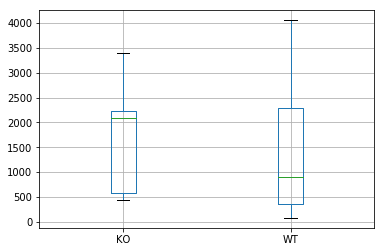

In [146]:
ContactNb_plotting(files)

In [135]:
input_filename = pnd.read_csv("menmentrying.csv")
file = input_filename.set_index("genotype")
KO_ContactTotalLen = []
WT_ContactTotalLen = []

a = file.loc["KO", "ContactTotalLen"]

KO_ContactTotalLen.append(i for i in a)
b = file.loc["WT", "ContactTotalLen"]
WT_ContactTotalLen.append(i for i in b)
# c = pnd.DataFrame(np.array(a,b))
# c.plot(kind="box")

# dic = {'KO':a, 'WT':b}
# dic


# df = pnd.DataFrame(dic)

#c = np.array(np.array(a),np.array(b))
#c.plot(kind="box")
# c = pnd.DataFrame(np.array(a,b), columns = columns, index=index)


type(a)



pandas.core.series.Series

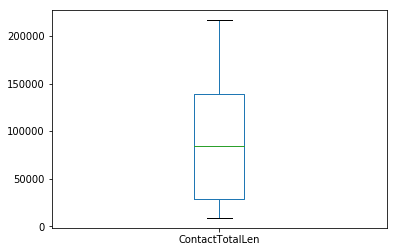

In [106]:
b.plot(kind="box")

In [23]:
input_filename
file = input_filename.set_index("genotype")

In [24]:
file

,ContactTotalLen,ContactNb,Oral-oralContactTotalLen,Oral-oralContactNb,Oral-genitalContactTotalLen,Oral-genitalContactNb,SidebysideContactTotalLen,SidebysideContactNb,"SidebysideContact,oppositewayTotalLen","SidebysideContact,oppositewayNb",...,RearisolatedNb,RearincontactTotalLen,RearincontactNb,StopisolatedTotalLen,StopisolatedNb,WallJumpTotalLen,WallJumpNb,WaterZoneTotalLen,WaterZoneNb,totalDistance
genotype,,,,,,,,,,,,,,,,,,,,,
KO,67578,2231,20460,2588,14170,2310,24429,2130,17774,1954,...,3525,1282,492,557467,50423,14230,5361,25023,3327,974.449671
KO,79479,2236,22346,2829,19224,2703,27659,2342,21803,2208,...,2533,1114,491,546760,40770,4654,1799,30319,2351,1042.222792
KO,74568,2228,20177,2688,19216,2709,24391,2486,20806,2400,...,2047,970,466,476676,28802,6970,2653,26918,1132,1065.465041
KO,76981,653,14145,1903,23599,2757,21618,1943,35407,1823,...,537,280,161,503979,23476,1010,418,1226,41,525.768802
KO,64424,503,12993,1865,16281,2279,20013,1579,33491,1394,...,746,1967,920,235333,12952,440,176,517,33,364.365596
KO,62784,615,11112,1761,17521,2201,20481,1854,23960,1844,...,654,201,113,375036,15952,754,310,754,34,424.969474
WT,132478,814,37093,4239,37890,5003,46228,3620,45067,3633,...,7265,3251,1632,221265,33501,1902,774,6308,478,897.398527
WT,127568,922,34102,4080,34724,4233,43011,3379,43137,3299,...,19777,3203,1697,314270,35963,1243,522,4084,284,1058.320211
WT,106218,861,25122,3710,24134,3692,33771,3191,32077,2976,...,17770,3222,1625,420628,36256,1673,655,5617,544,1426.039224


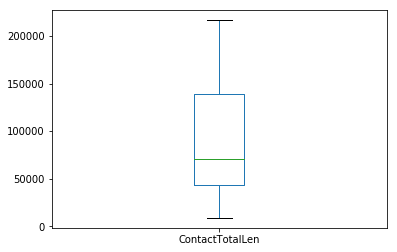

In [31]:
input_filename.plot(kind = "box",x ="genotype" , y = "ContactTotalLen")

In [35]:
for line in input_filename: 
    if line[0] == "KO":
        input_filename.plot(kind="box", y="ContactTotalLen")

In [ ]:
from openpyxl import load_workbook

import numpy as np
import matplotlib.pyplot as plt

#Open Excel Spreadsheet
workbook = load_workbook(files)
sheet = workbook.active 

#Define variables to plot
ContactTotalLen = []
ContactNb = []
OraloralContactTotalLen = []
Oral-genitalContactTotalLen = []
SidebysideContactTotalLen = []
SidebysideContact,oppositewayTotalLen = []
SocialapproachNb = []
GetawayNb = []
ApproachcontactNb = []
ApproachrearNb = []
BreakcontactNb = []
'''
Train2TotalLen
Train2Nb
Group2TotalLen
Group3TotalLen
Group3breakNb
Group3makeNb
Group4breakNb
MoveisolatedTotalLen
MoveincontactTotalLen
RearingTotalLen
RearisolatedTotalLen
RearincontactTotalLen
StopisolatedTotalLen
WallJumpNb
WaterZoneTotalLen
'''
totalDistance = []

#Extract values from line
for row in sheet.iter_rows(min_row=2, max_row=33, min_col=2, max_col=30, values_only=True)
    ContactTotalLen.append[]

barWidth = 0.3
bars1 = [ContactTotalLen] KO night values
bars2 = [] KO day values
bars3 = [] WT night values
bars4 = [] WT day values

yer1 = [] error bars height


# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='KO')
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='WT')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

In [4]:
file = getFilesToProcess()

<function matplotlib.pyplot.show(*args, **kw)>

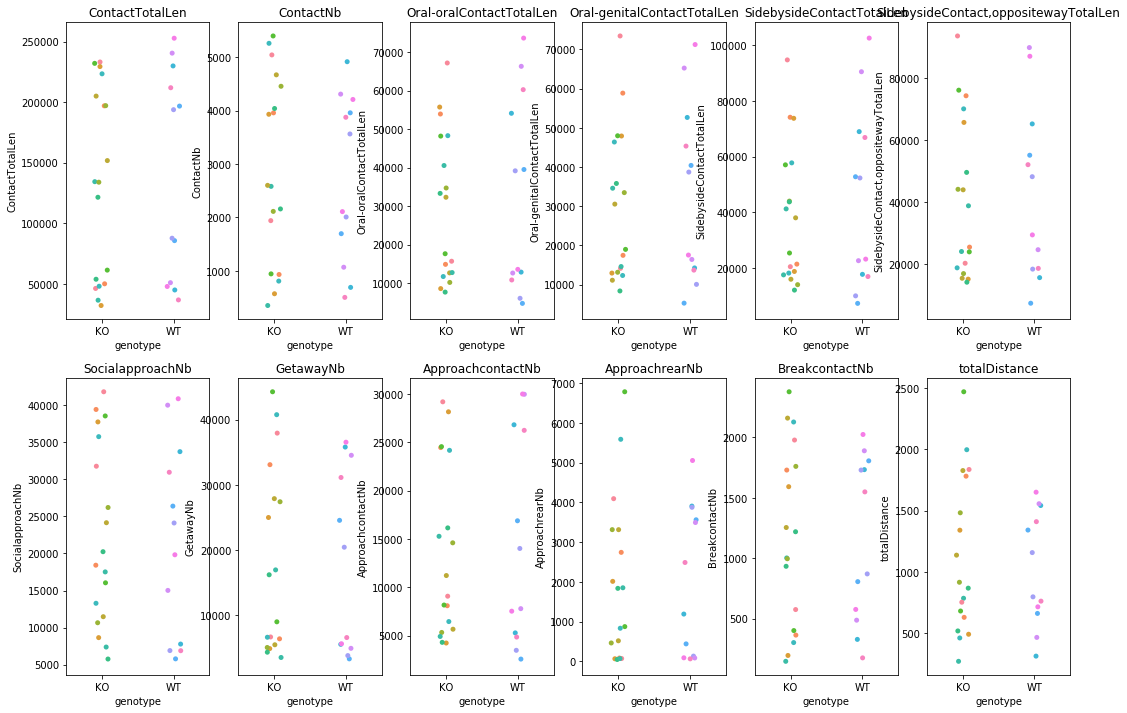

In [36]:
df = pd.read_csv('encoreuntest.csv',usecols=['genotype','ContactTotalLen','Time', 'Number', 'ContactNb','Oral-oralContactTotalLen','Oral-genitalContactTotalLen','SidebysideContactTotalLen','SidebysideContact,oppositewayTotalLen','SocialapproachNb','GetawayNb','ApproachcontactNb','ApproachrearNb','BreakcontactNb','totalDistance'])
Genotype = ['KO', 'WT']
df = df.loc[df.genotype.isin(Genotype)]
df.head()

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 12))
    
row=0
col=0
event = ['ContactTotalLen','ContactNb','Oral-oralContactTotalLen','Oral-genitalContactTotalLen','SidebysideContactTotalLen','SidebysideContact,oppositewayTotalLen','SocialapproachNb','GetawayNb','ApproachcontactNb','ApproachrearNb','BreakcontactNb','totalDistance']
i = 0
for event[i] in event:
    axes[row,col].set_xlim(-0.5, 1.5)
    #axes[row,col].set_ylim(min(y)-0.2*max(y), max(y)+0.2*max(y))
    sns.stripplot(data=df, x='genotype', y=event[i], hue='Number', ax = axes[row,col])
    #sns.catplot(data=df, x='genotype', y=event[i], hue='Number', col='Time', kind="strip", ax = axes[row,col], height=4, aspect=.7, legend=False)
    axes[row,col].set_title(event[i])
    axes[row,col].legend().set_visible(False)
    
    if col<5:
        col+=1
        row=row
    else:
        col=0
        row+=1
    i += 1
    
plt.show



## Female Behavior

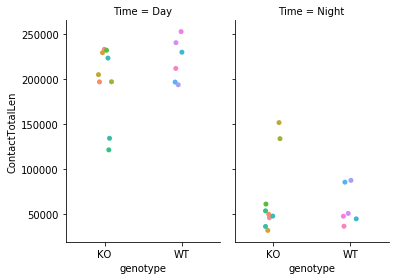

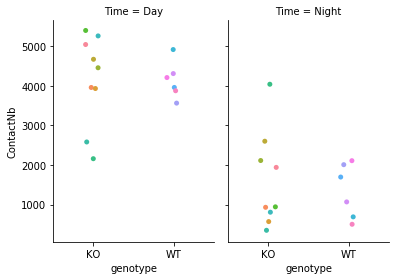

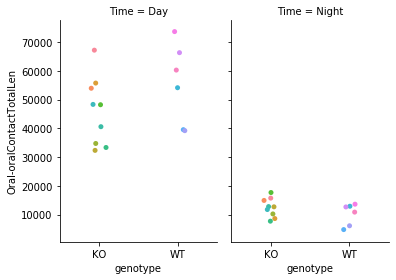

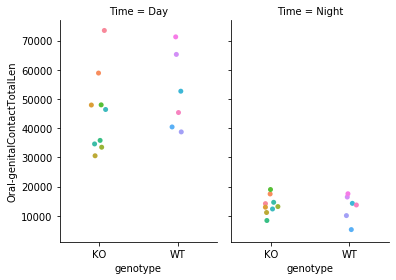

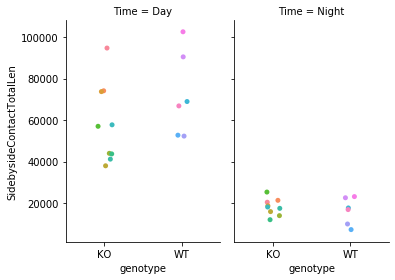

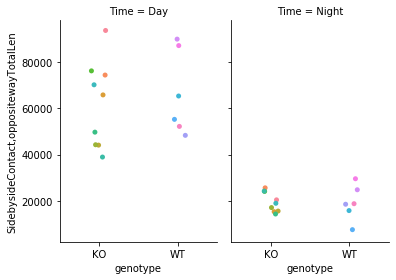

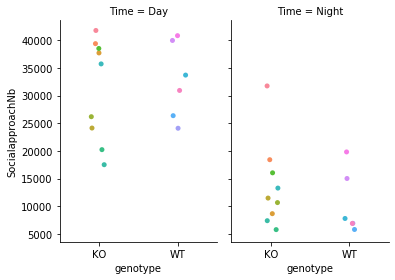

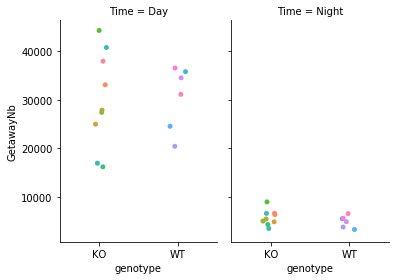

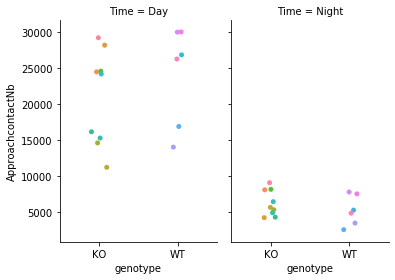

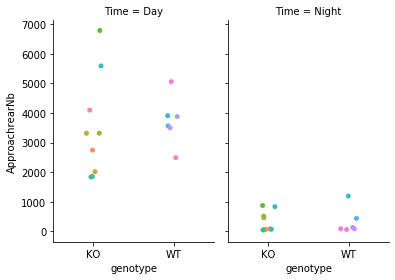

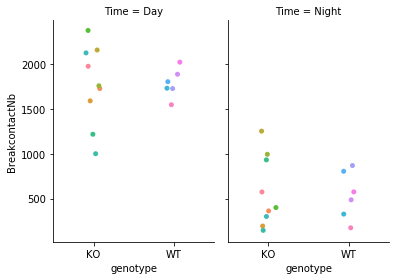

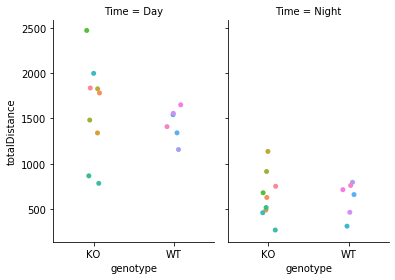

In [11]:
df = pd.read_csv('encoreuntest.csv',usecols=['genotype','ContactTotalLen','Time', 'Number', 'ContactNb','Oral-oralContactTotalLen','Oral-genitalContactTotalLen','SidebysideContactTotalLen','SidebysideContact,oppositewayTotalLen','SocialapproachNb','GetawayNb','ApproachcontactNb','ApproachrearNb','BreakcontactNb','totalDistance'])
Genotype = ['KO', 'WT']
df = df.loc[df.genotype.isin(Genotype)]
df.head()

event = ['ContactTotalLen','ContactNb','Oral-oralContactTotalLen','Oral-genitalContactTotalLen','SidebysideContactTotalLen','SidebysideContact,oppositewayTotalLen','SocialapproachNb','GetawayNb','ApproachcontactNb','ApproachrearNb','BreakcontactNb','totalDistance']
#event = ['ContactTotalLen','ContactNb','Oral-oralContactTotalLen','Oral-genitalContactTotalLen']


p = sns.catplot(data=df, x='genotype', y=event[0], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
q = sns.catplot(data=df, x='genotype', y=event[1], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False) 
r = sns.catplot(data=df, x='genotype', y=event[2], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
s = sns.catplot(data=df, x='genotype', y=event[3], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
t = sns.catplot(data=df, x='genotype', y=event[4], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
u = sns.catplot(data=df, x='genotype', y=event[5], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
v = sns.catplot(data=df, x='genotype', y=event[6], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
w = sns.catplot(data=df, x='genotype', y=event[7], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
x = sns.catplot(data=df, x='genotype', y=event[8], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
y = sns.catplot(data=df, x='genotype', y=event[9], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
z = sns.catplot(data=df, x='genotype', y=event[10], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
a = sns.catplot(data=df, x='genotype', y=event[11], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  


## Male Behavior

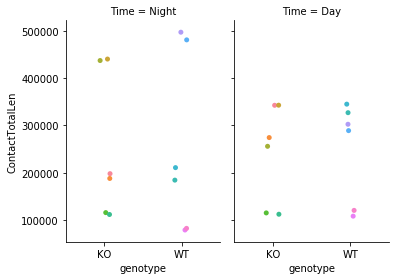

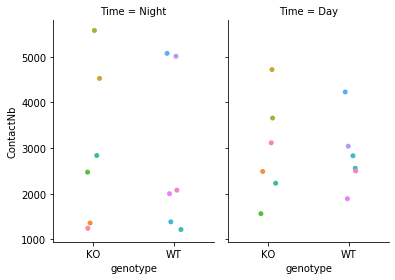

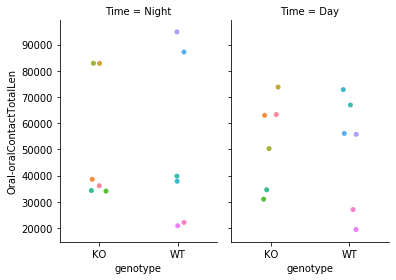

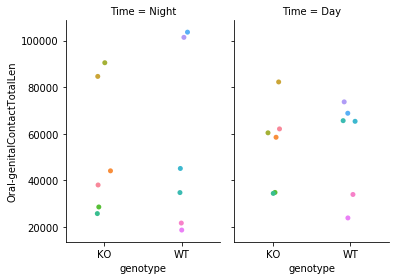

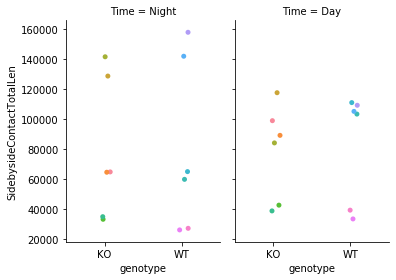

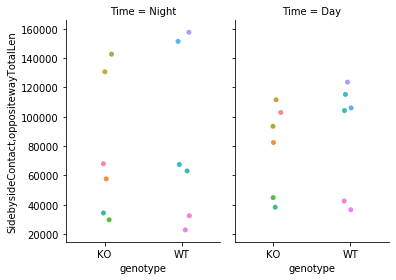

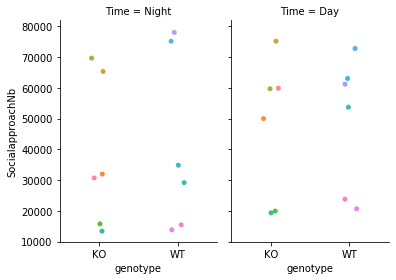

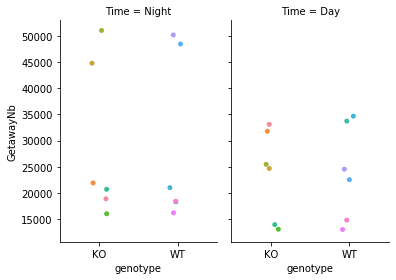

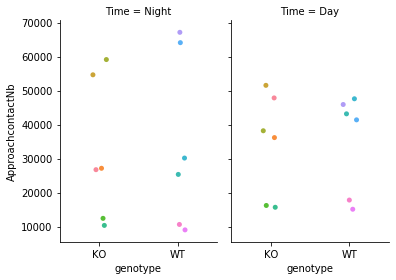

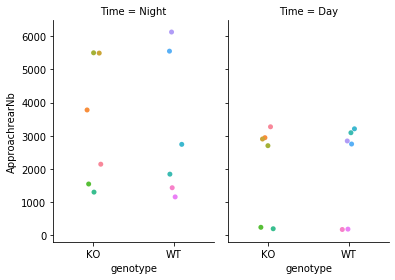

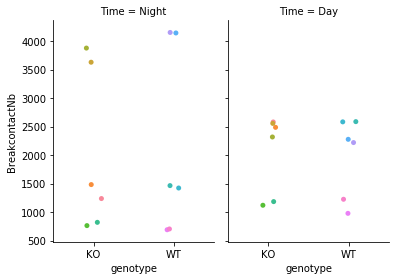

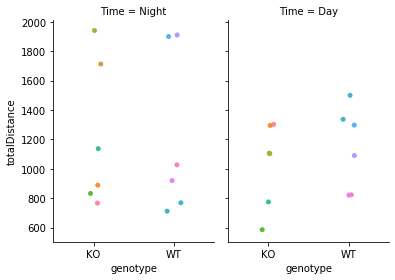

In [13]:
df = pd.read_csv('testmale.csv',usecols=['genotype','ContactTotalLen','Time', 'Number', 'ContactNb','Oral-oralContactTotalLen','Oral-genitalContactTotalLen','SidebysideContactTotalLen','SidebysideContact,oppositewayTotalLen','SocialapproachNb','GetawayNb','ApproachcontactNb','ApproachrearNb','BreakcontactNb','totalDistance'])
Genotype = ['KO', 'WT']
df = df.loc[df.genotype.isin(Genotype)]
df.head()

event = ['ContactTotalLen','ContactNb','Oral-oralContactTotalLen','Oral-genitalContactTotalLen','SidebysideContactTotalLen','SidebysideContact,oppositewayTotalLen','SocialapproachNb','GetawayNb','ApproachcontactNb','ApproachrearNb','BreakcontactNb','totalDistance']
#event = ['ContactTotalLen','ContactNb','Oral-oralContactTotalLen','Oral-genitalContactTotalLen']


p = sns.catplot(data=df, x='genotype', y=event[0], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
q = sns.catplot(data=df, x='genotype', y=event[1], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False) 
r = sns.catplot(data=df, x='genotype', y=event[2], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
s = sns.catplot(data=df, x='genotype', y=event[3], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
t = sns.catplot(data=df, x='genotype', y=event[4], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
u = sns.catplot(data=df, x='genotype', y=event[5], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
v = sns.catplot(data=df, x='genotype', y=event[6], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
w = sns.catplot(data=df, x='genotype', y=event[7], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
x = sns.catplot(data=df, x='genotype', y=event[8], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
y = sns.catplot(data=df, x='genotype', y=event[9], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
z = sns.catplot(data=df, x='genotype', y=event[10], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
a = sns.catplot(data=df, x='genotype', y=event[11], hue='Number', col='Time', kind="strip", height=4, aspect=.7, legend=False)  
